In [196]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
from numpy import percentile
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import pickle

# Import dataset
df = pd.read_csv("insurance3r2_numbered.csv")
display(df.head(20))
display(df.shape)
display(df.info())

,no.,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,1,19,0,27.900,3009,0,1,3,16884.92400,1
1,2,18,1,33.770,3008,1,0,2,1725.55230,1
2,3,28,1,33.000,3009,3,0,2,4449.46200,0
3,4,33,1,22.705,10009,0,0,1,21984.47061,0
4,5,32,1,28.880,8010,0,0,1,3866.85520,1
5,6,31,0,25.740,8005,0,0,2,3756.62160,0
6,7,46,0,33.440,3002,1,0,2,8240.58960,1
7,8,37,0,27.740,8007,3,0,1,7281.50560,0
8,9,37,1,29.830,8002,2,0,0,6406.41070,0
9,10,60,0,25.840,5008,0,0,1,28923.13692,0


(1247, 10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   no.             1247 non-null   int64  
 1   age             1247 non-null   int64  
 2   sex             1247 non-null   int64  
 3   bmi             1247 non-null   float64
 4   steps           1247 non-null   int64  
 5   children        1247 non-null   int64  
 6   smoker          1247 non-null   int64  
 7   region          1247 non-null   int64  
 8   charges         1247 non-null   float64
 9   insuranceclaim  1247 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 97.5 KB


None

# Exploratory Data Analysis (EDA)

## Missing Data Analysis

In [197]:
# Select rows from dataframe
x = df.iloc[:, :]

# Sum of null data based on attributes/check NA
x.isnull().sum()

no.               0
age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [198]:
# Drop the column "no."
df = df.iloc[:,1:]
df.sample(10)

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
979,55,1,27.645,5000,0,0,1,10594.50155,1
163,24,0,33.345,3007,0,0,1,2855.43755,1
279,47,1,25.410,4004,1,1,2,21978.67690,1
468,24,0,25.270,8002,0,0,0,3044.21330,0
29,18,0,26.315,8004,0,0,0,2198.18985,1
862,46,1,25.800,8010,5,0,3,10096.97000,1
225,23,0,36.670,3000,2,1,0,38511.62830,1
801,55,0,33.535,3000,2,0,1,12269.68865,0
229,54,1,30.020,4005,0,0,1,24476.47851,1
353,55,1,30.685,3004,0,1,0,42303.69215,1


In [199]:
df.describe(include='all')

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000,1247.000000
mean,37.508420,0.506816,30.533617,5410.742582,1.126704,0.202085,1.514836,12701.745887,0.573376
std,13.010419,0.500154,6.110562,2489.982618,1.208577,0.401716,1.105755,11933.851913,0.494785
min,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,26.000000,0.000000,26.125000,3008.000000,0.000000,0.000000,1.000000,4483.480325,0.000000
50%,37.000000,1.000000,30.200000,4007.000000,1.000000,0.000000,2.000000,8606.217400,1.000000
75%,49.000000,1.000000,34.415000,8005.000000,2.000000,0.000000,2.000000,16265.346500,1.000000
max,60.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000


## Data Visualization

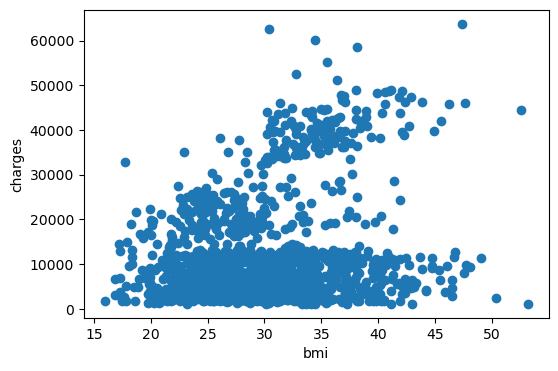

In [200]:
fig, ax = plt.subplots(figsize=(6, 4))
ax.scatter(df['bmi'], df['charges'])
ax.set_xlabel('bmi')
ax.set_ylabel('charges')
plt.show()

<AxesSubplot:xlabel='bmi', ylabel='charges'>

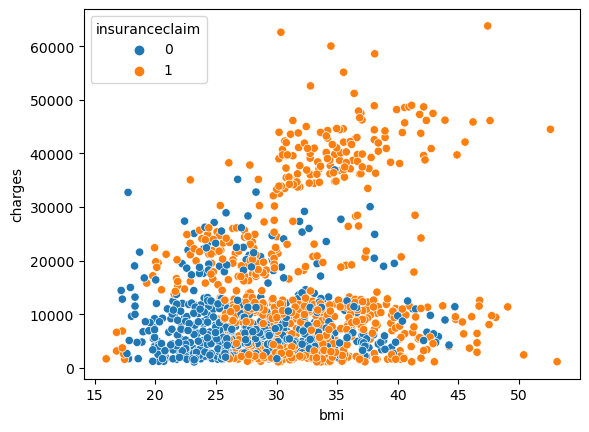

In [201]:
sns.scatterplot(x="bmi",
                    y="charges",
                    hue="insuranceclaim",
                    data=df)

In [202]:
'''
Categorize age to different age groups:
0-2: Infant
3-4: Toddler
5-13: Kid
14-20: Teen
Above 20: Adult
'''
bins= [0,2,4,13,20,110]
labels = ['Infant','Toddler','Kid','Teen','Adult']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df = df[['age', 'AgeGroup', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'charges', 'insuranceclaim']]
display(df.head(20))

,age,AgeGroup,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,Teen,0,27.900,3009,0,1,3,16884.92400,1
1,18,Teen,1,33.770,3008,1,0,2,1725.55230,1
2,28,Adult,1,33.000,3009,3,0,2,4449.46200,0
3,33,Adult,1,22.705,10009,0,0,1,21984.47061,0
4,32,Adult,1,28.880,8010,0,0,1,3866.85520,1
5,31,Adult,0,25.740,8005,0,0,2,3756.62160,0
6,46,Adult,0,33.440,3002,1,0,2,8240.58960,1
7,37,Adult,0,27.740,8007,3,0,1,7281.50560,0
8,37,Adult,1,29.830,8002,2,0,0,6406.41070,0
9,60,Adult,0,25.840,5008,0,0,1,28923.13692,0


In [203]:
result = df.pivot_table(
    index="AgeGroup", columns="smoker", values="charges", aggfunc="sum", margins=True
)

display(result)

smoker,0,1,All
AgeGroup,,,
Infant,0.000000e+00,0.000000e+00,NaN
Toddler,0.000000e+00,0.000000e+00,NaN
Kid,0.000000e+00,0.000000e+00,NaN
Teen,3.600999e+05,7.917070e+05,1.151807e+06
Adult,7.553665e+06,7.133605e+06,1.468727e+07
All,7.913765e+06,7.925312e+06,1.583908e+07


## Correlation Analysis

### Continuous — Continuous (Spearman's rank correlation coefficient)

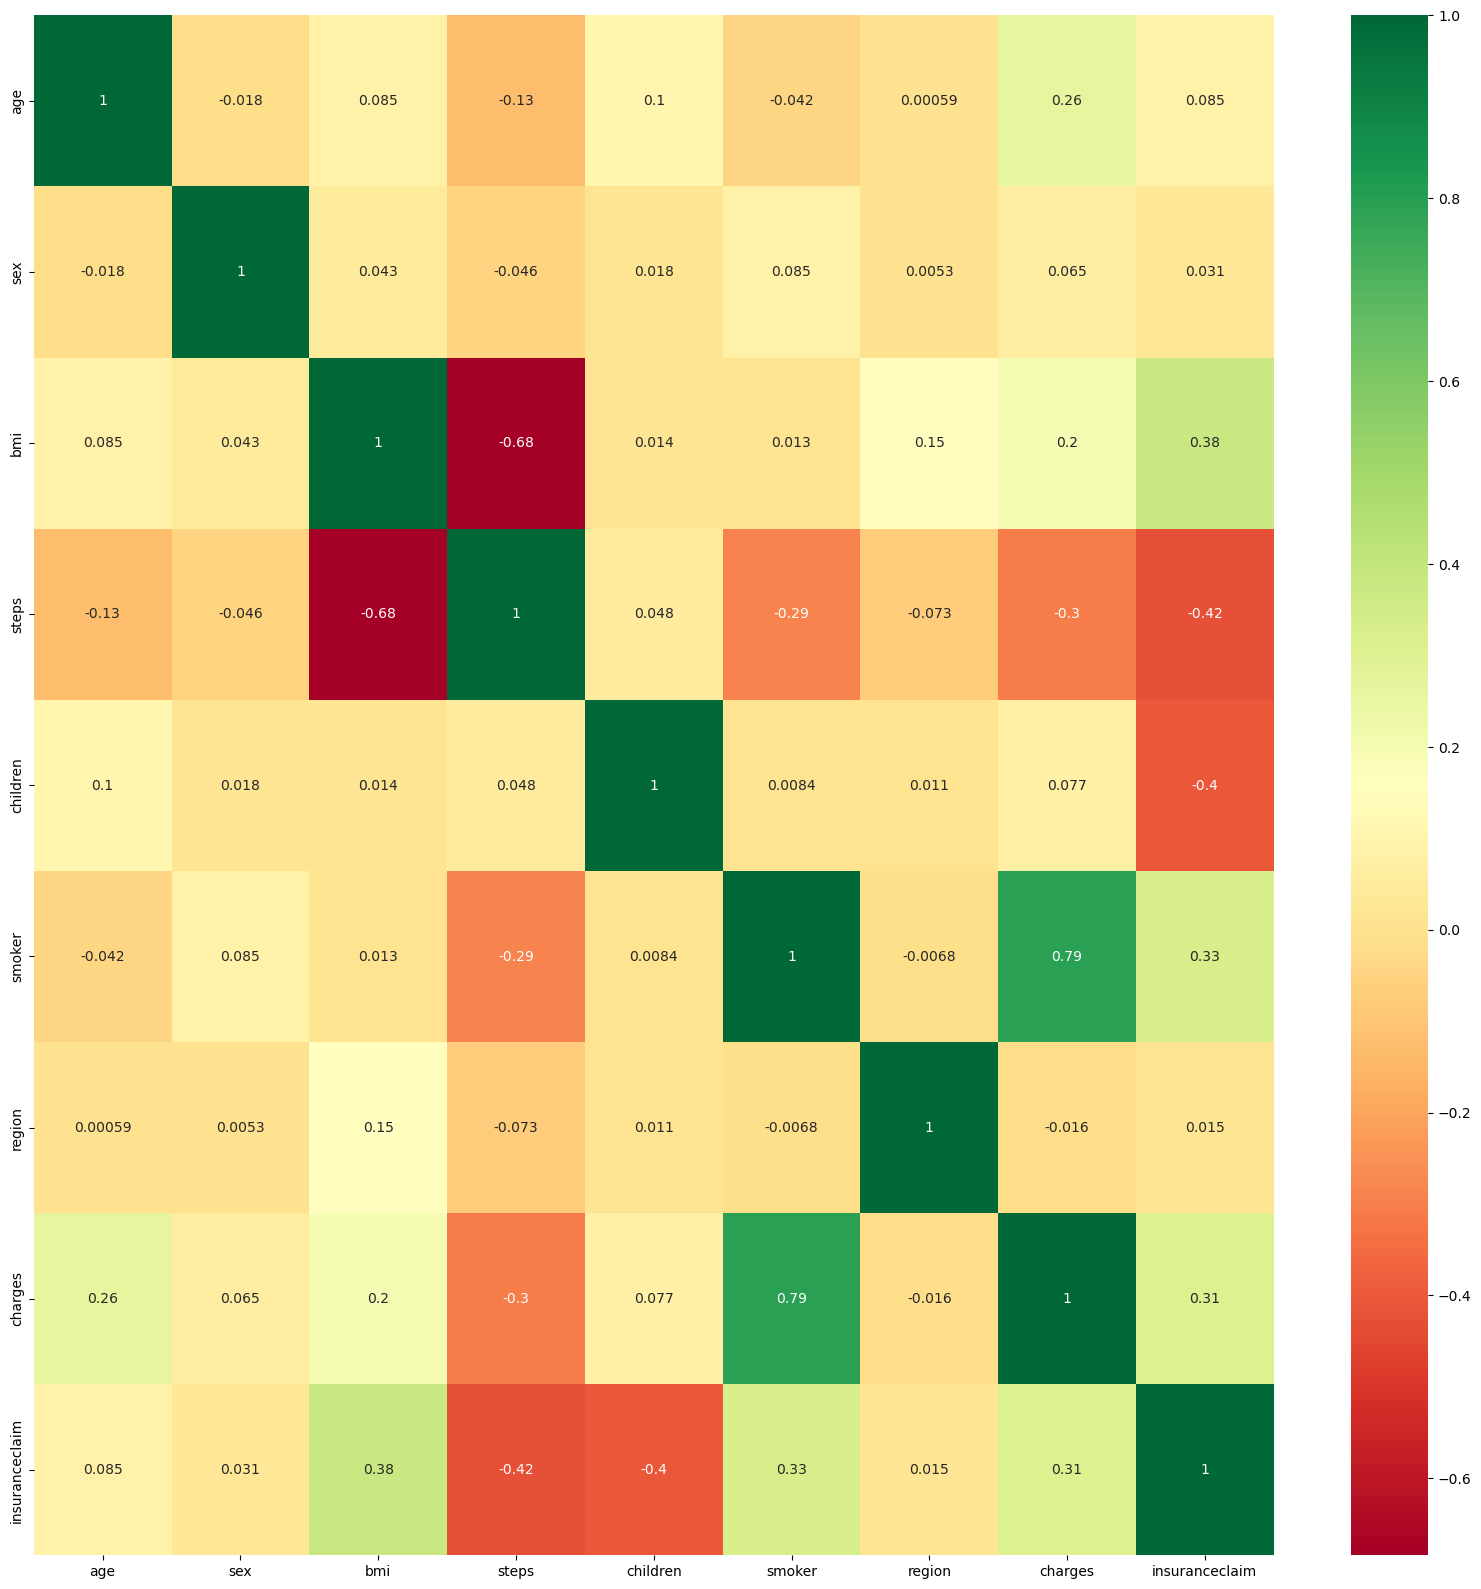

In [204]:
#get correlations of each features in dataset
corrmat = df.corr(method='spearman')
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Categorical — Continuous (Point-biserial correlation)

In [205]:
# stats.pointbiserialr(df['charges'], df['sex'])

### Categorical — Categorical (Cramer’s V)

In [206]:
# https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792
def cramers_v(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher,
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

In [207]:
confusion_matrix = pd.crosstab(df['sex'], df['smoker'])
print(confusion_matrix)
cramers_v(confusion_matrix.values)

smoker    0    1
sex             
0       512  103
1       483  149


0.07806188227937465

In [208]:
confusion_matrix = pd.crosstab(df['sex'], df['region'])
print(confusion_matrix)
cramers_v(confusion_matrix.values)

region    0    1    2    3
sex                       
0       150  152  163  150
1       153  150  176  153


0.0

In [209]:
confusion_matrix = pd.crosstab(df['sex'], df['insuranceclaim'])
print(confusion_matrix)
cramers_v(confusion_matrix.values)

insuranceclaim    0    1
sex                     
0               272  343
1               260  372


0.00857370105863884

In [210]:
confusion_matrix = pd.crosstab(df['smoker'], df['region'])
print(confusion_matrix)
cramers_v(confusion_matrix.values)

region    0    1    2    3
smoker                    
0       240  249  256  250
1        63   53   83   53


0.05386541272469865

In [211]:
confusion_matrix = pd.crosstab(df['smoker'], df['insuranceclaim'])
print(confusion_matrix)
cramers_v(confusion_matrix.values)

insuranceclaim    0    1
smoker                  
0               507  488
1                25  227


0.3300560134220606

In [212]:
confusion_matrix = pd.crosstab(df['region'], df['insuranceclaim'])
print(confusion_matrix)
cramers_v(confusion_matrix.values)

insuranceclaim    0    1
region                  
0               127  176
1               152  150
2               115  224
3               138  165


0.11310721736872183

## Outlier Analysis

In [213]:
# calculate interquartile range
q25, q75 = percentile(df['bmi'], 25), percentile(df['bmi'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

# calculate the outlier cutoff
cut_off = iqr * 3
lower, upper = q25 - cut_off, q75 + cut_off

# identify outliers
outliers = [a for a in df['bmi'] if a < lower or a > upper]
print('Identified outliers: %d' % len(outliers))

Percentiles: 25th=26.125, 75th=34.415, IQR=8.290
Identified outliers: 0


In [214]:
# calculate interquartile range
q25, q75 = percentile(df['charges'], 25), percentile(df['charges'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

# calculate the outlier cutoff
cut_off = iqr * 3
lower, upper = q25 - cut_off, q75 + cut_off

# identify outliers
outliers = [a for a in df['charges'] if a < lower or a > upper]
print('Identified outliers: %d' % len(outliers))

Percentiles: 25th=4483.480, 75th=16265.346, IQR=11781.866
Identified outliers: 6


In [215]:
df['outlier'] = np.where((df['charges'] < lower) | (df['charges'] > upper), 1, 0)
df.loc[df['outlier'] == 1]

,age,AgeGroup,sex,bmi,steps,children,smoker,region,charges,insuranceclaim,outlier
500,54,Adult,0,47.410,4010,0,1,2,63770.42801,1,1
531,31,Adult,0,38.095,3000,1,1,0,58571.07448,1,1
761,33,Adult,0,35.530,3004,0,1,1,55135.40209,1,1
1065,60,Adult,1,32.800,3005,0,1,3,52590.82939,1,1
1148,52,Adult,1,34.485,4006,3,1,1,60021.39897,1,1
1214,45,Adult,1,30.360,4002,0,1,2,62592.87309,1,1


In [216]:
# Filter rows to remove outlier
data = df[(df.outlier != 1)]

# Drop the column "AgeGroup"
data = data.drop(columns=['AgeGroup', 'outlier'])
display(data.head(20))
display(data.shape)

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1
5,31,0,25.740,8005,0,0,2,3756.62160,0
6,46,0,33.440,3002,1,0,2,8240.58960,1
7,37,0,27.740,8007,3,0,1,7281.50560,0
8,37,1,29.830,8002,2,0,0,6406.41070,0
9,60,0,25.840,5008,0,0,1,28923.13692,0


(1241, 9)

In [217]:
# check target class distribution
data['insuranceclaim'].value_counts()

1    709
0    532
Name: insuranceclaim, dtype: int64

## Data Modeling

In [218]:
X = data.iloc[:,:-1] # Select all attributes except the last one (descriptive attributes)
y = data.iloc[:,-1] # Classification on 'insuranceclaim' (target attribute)

# Split dataset in training and test datasets
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

### Naïve Bayes

Number of mislabeled points out of a total 249 points: 47, Accuracy: 81.12%


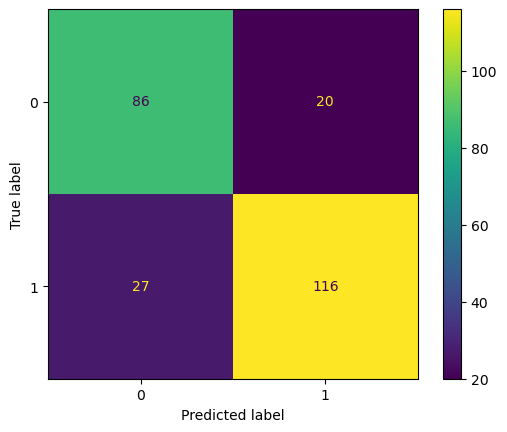

In [219]:
# Instantiate the classifier
gnb_classifier = GaussianNB()

# Train classifier
gnb_classifier.fit(x_train,y_train)

# Test the classifier
predict = gnb_classifier.predict(x_test)

# Print results
print("Number of mislabeled points out of a total {} points: {}, Accuracy: {:05.2f}%"
 .format(x_test.shape[0], (y_test != predict).sum(),
 gnb_classifier.score(x_test,y_test)*100 ))

confusion_matrix = metrics.confusion_matrix(y_test, predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

### Support Vector Machine

Number of mislabeled points out of a total 249 points: 50, Accuracy: 79.92%


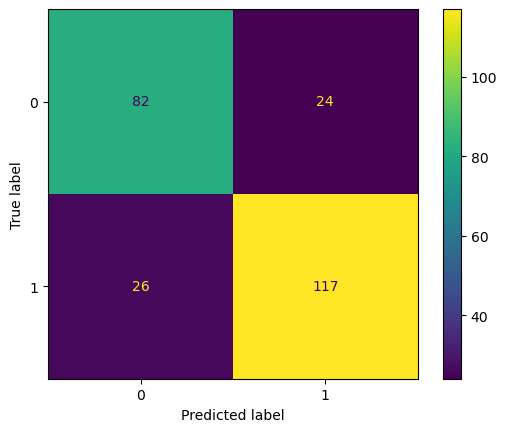

In [220]:
# input SVM and train the model
svm_classifier = SVC(kernel='linear', class_weight='balanced')
svm_classifier.fit(x_train, y_train)

# Test the classifier
predict = svm_classifier.predict(x_test)

# Print results
print("Number of mislabeled points out of a total {} points: {}, Accuracy: {:05.2f}%"
 .format(x_test.shape[0], (y_test != predict).sum(),
 svm_classifier.score(x_test,y_test)*100 ))

confusion_matrix = metrics.confusion_matrix(y_test, predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

### k-nearest neighbors

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

Number of mislabeled points out of a total 249 points: 77, Accuracy: 69.08%


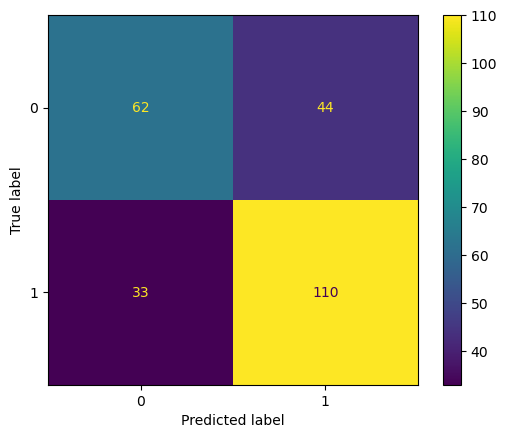

In [221]:
# baseline knn
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(x_train, y_train)

# Test the classifier
predict = knn_classifier.predict(x_test)

# Print results
print("Number of mislabeled points out of a total {} points: {}, Accuracy: {:05.2f}%"
 .format(x_test.shape[0], (y_test != predict).sum(),
 knn_classifier.score(x_test,y_test)*100 ))

confusion_matrix = metrics.confusion_matrix(y_test, predict)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

In [222]:
pickle.dump(gnb_classifier, open("insurance_prediction.pkl", 'wb'))